In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [18]:
#For FN angle averaged PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [193]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [216]:
tmep_final = PCA_total['p'].T[:4]
sTemplet = np.mean(tmep_final.T[:100], axis=0)[:4]

In [222]:
tmep_final.shape

(4, 600)

In [220]:
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)

In [224]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

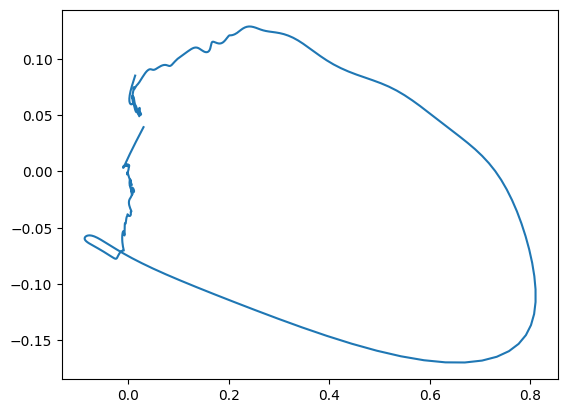

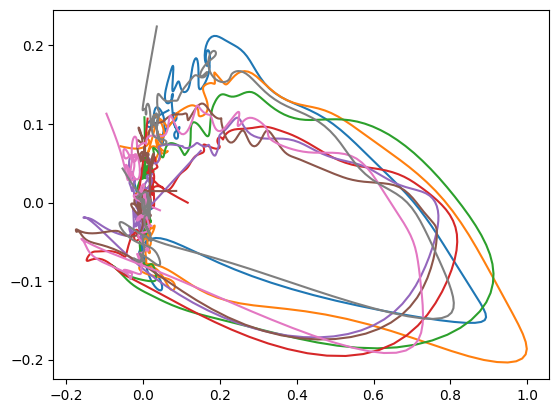

In [226]:
# Plotting

plt.figure()
plt.plot(nPCA_out[0], nPCA_out[1])

plt.figure()
for a in range(8):
    plt.plot(nfinal_out[a][0], nfinal_out[a][1])

In [230]:
# Fitting

pca_p = nPCA_out[:4]
time = np.linspace(-300, 300, 600)

r_s_total = []
for a in range(8):
    resid = np.linalg.norm(pca_p - nfinal_out[a], axis=1)**2
    r_s = 1 - resid / (final_out[a].size * nfinal_out[a].var())
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

Text(0.5, 1.0, 'a=0, b=3, R^2=0.9962711201957958')

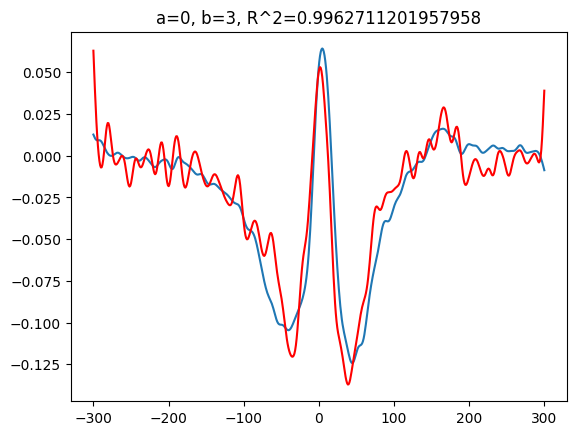

In [235]:
# Plotting

a = 0
b = 3

r_s = r_s_total[a][b]
plt.plot(time, pca_p[b], time, nfinal_out[a][b], 'r')
plt.title(f'a={a}, b={b}, R^2={r_s}')

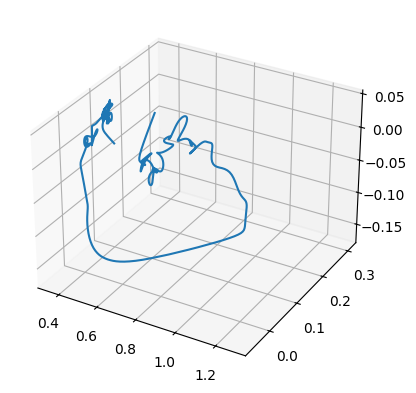

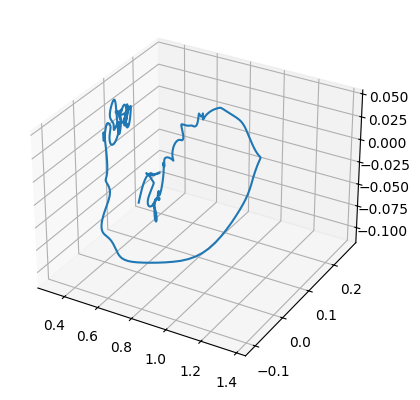

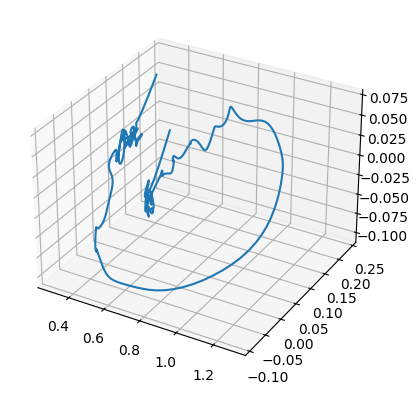

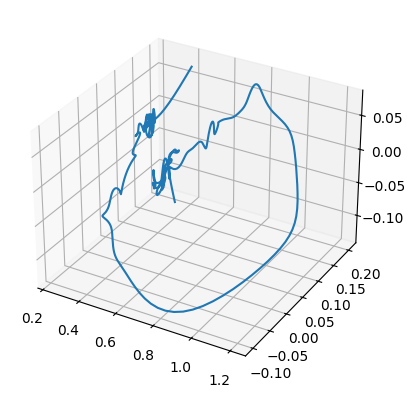

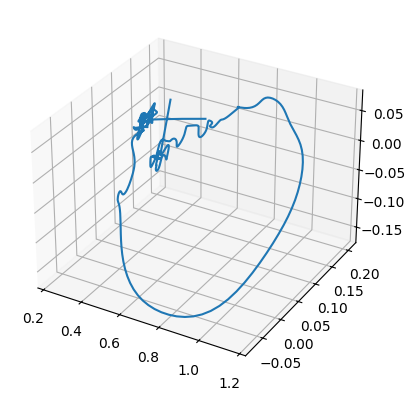

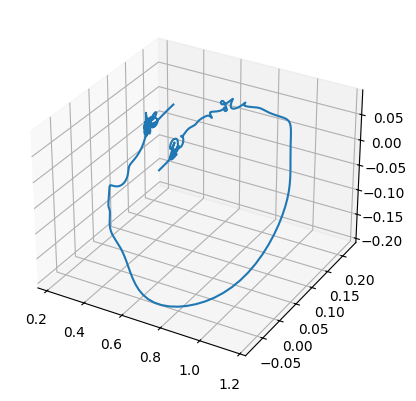

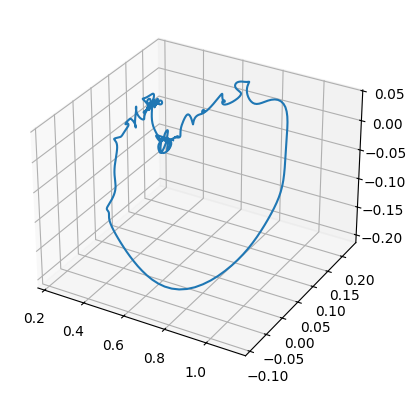

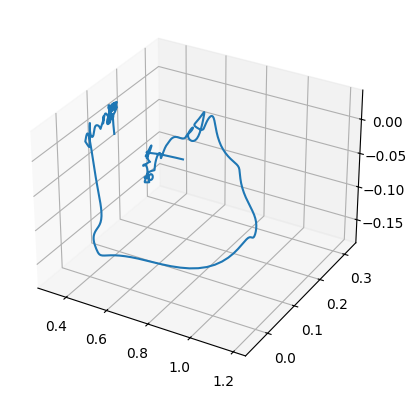

In [50]:
a=24
t = np.arange(-250,250)
plt.plot(t, pFN[a], t, pMPC @ betas[a], 'r')
resid = np.linalg.norm(pMPC @ betas[a] - pFN[a])**2
r_s = 1 - resid / (pFN[a].size * pFN[a].var())
plt.title(f'a={a}, R^2={r_s}')

In [ ]:
Wa 